# Download BioMassters Data

### Download using command line

In [6]:
%cd /Users/loaner/projects/dd-biomassters/
!python ./pix2pix/datasets/biomassters_downloader.py \
    --phase train \
    --dataroot ./data \
    --metadata_file data/metadata/features_metadata_split_42.csv \
    --dataset_size 100 \
    --is_imputable_s1 \
    --satellite S1 \

/Users/loaner/projects/dd-biomassters
0 c6154538
1 f112fcf1
2 cf8a7594
3 00ff36dd
4 67c3be04
5 1718f00d
6 66c1a458
7 01ccc4cf
8 ce49f607
9 a307ac91
10 b142c357
11 0610fc19
12 94465264
13 f4a212e3
14 f822769e
15 a5fad3b7
16 31698b5d
17 6bca9a38
18 d1a4a334
19 f2e15209
20 3ab08b40
21 92fd5670
22 512ef0be
23 4abeab14
24 3e398cfe
25 29238ab7
26 3a3398df
27 19842835
28 cd25f538
29 dba50c51
30 76953691
31 62e0f14d
32 0131497d
33 1e09df9e
34 7f36fddf
35 95bfa78b
36 8c94e3ad
37 add091ae
38 53095eac
39 641b7ad2
40 ed2f7a7c
41 9c2d26a5
42 23d486b5
43 54e0766a
44 91fac078
45 99ea7e0b
46 12224d5f
47 8a034368
48 9662c5d2
49 f30802c2
50 66133b24
51 5dfc16de
52 26ef32b5
53 fab8e39b
54 04203dc4
55 222abd19
56 d0722526
57 9bec470b
58 f016331a
59 5ba504e6
60 f96c68c0
61 ef699037
62 ec1f5511
63 30875b12
64 33ea947f
65 38e926b9
66 abb9e525
67 3ccfcac5
68 9a6abb7b
69 56400043
70 f044715b
71 1549f396
72 5a2aa82c
73 8106f35b
74 f579f6be
75 1f874243
76 31871700
77 2a769c28
78 15728cd4
79 844277e5
80 0b0926dd


### Download from module

In [1]:
%cd /Users/loaner/projects/dd-biomassters/pix2pix/
from datasets.biomassters_downloader import BioMasstersDownloader

metadata_file = "../data/metadata/features_metadata_split_42.csv"
dd = BioMasstersDownloader(
    phase='train', 
    dataroot='../data/', 
    dataset_size=5,
    metadata_file=metadata_file, 
    satellite='S1',
    chip_is_complete=True, 
    is_imputable_s1=True)
dd.run(load_tif=True)

/Users/loaner/projects/dd-biomassters/pix2pix
0 dbe9a663
1 584e3e68
2 55a14920
3 25fd4e5d
4 63d80a6c


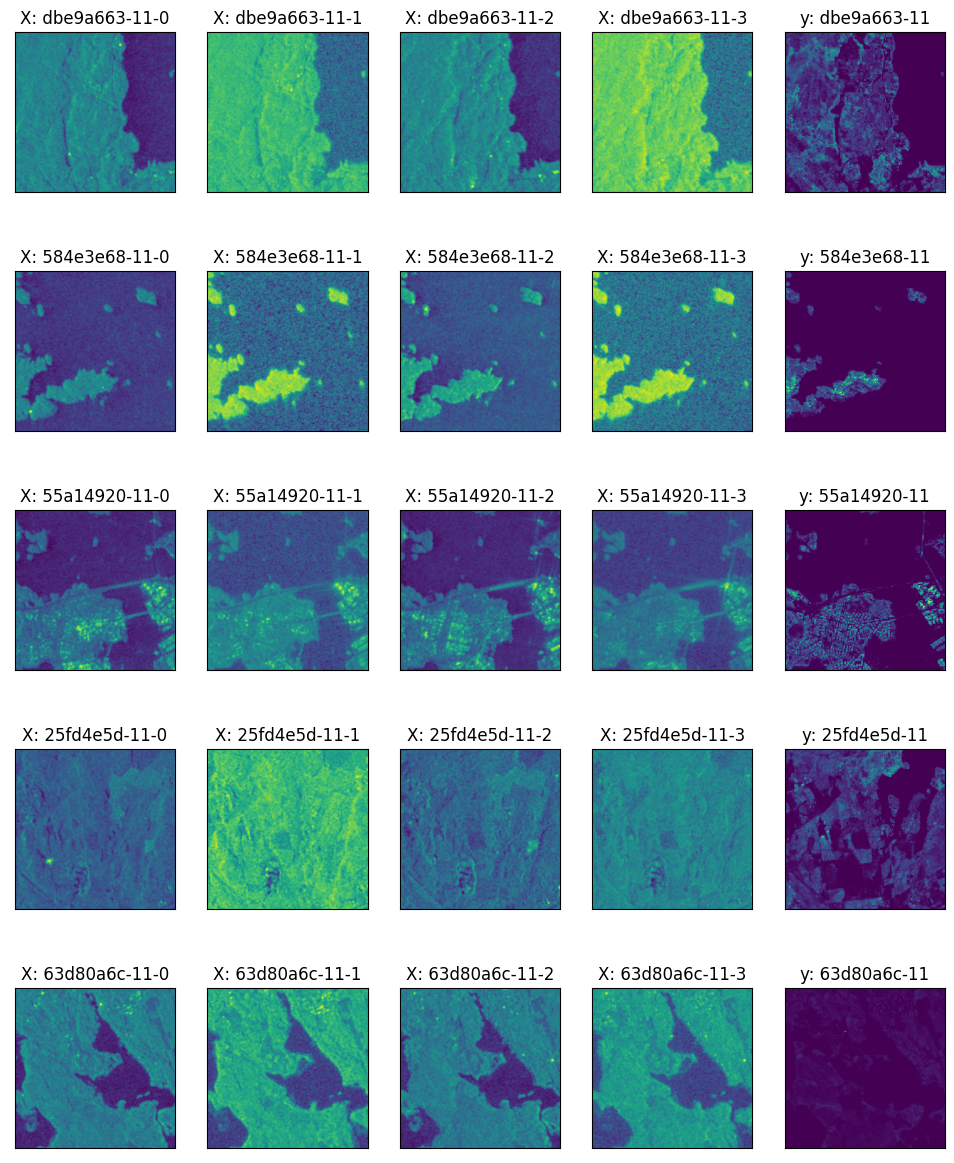

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

num_images = min(len(dd.images), 20)
satellite = 1
month = 11
offset, num_channels = (48 + month * 11, 11) if satellite == 2 else (0 + month * 4, 4)

fig, axes = plt.subplots(nrows=num_images, ncols=num_channels+1, figsize=(3*num_channels,3*num_images))
axes = axes.flatten()
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

for i, data in enumerate(dd.images):
    chip_id, X, y = data.values()
    for ch in range(num_channels):
        idx = i*(num_channels+1) + ch 
        axes[idx].imshow(X[:,:,ch + offset])
        axes[idx].set_title(f'X: {chip_id}-{month}-{ch}')
    axes[idx+1].imshow(y)
    axes[idx+1].set_title(f'y: {chip_id}-{month}')